# Decision Trees

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes. (IBM, 2023)

In a more graphical sense, decision trees for classification split the feature space in recursive partitions making it so the new sections have clearly discernible and unique class.  By doing this, it creates a structure to separate new data into these sections which can then be used to predict their outcome. 

Advantages of this model is it's interpretability for small variable quantities and flexibility to adapt its predictive capabilities depending on the size of the tree. 

# Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from yellowbrick.classifier import classification_report, confusion_matrix
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.preprocessing import LabelEncoder

# Import Data

In [4]:
X_train = pd.read_csv('0_X_train.csv', index_col='Id')
X_valid = pd.read_csv('1_X_valid.csv', index_col='Id')
X_test  = pd.read_csv('2_X_test.csv', index_col='Id')

y_train = pd.read_csv('0_y_train.csv', index_col='Id')
y_valid = pd.read_csv('1_y_valid.csv', index_col='Id')
y_test  = pd.read_csv('2_y_test.csv', index_col='Id')

#full training set
X = pd.concat([X_train, X_valid, X_test], axis=0)
y = pd.concat([y_train, y_valid, y_test], axis=0)

We modify the Y values to format correctly as per the  `scikitlearn` functions.

In [5]:
y_train = np.array(y_train)
y_train = y_train.ravel()

y = np.array(y)
y = y.ravel()

# Train a full Tree

We begin by creating a decision tree. As part of the parameters required, we select a loss function which python uses to train the model. In our case we will use `log_loss`. This tries to minimize the logarithm of the residual of the prediction probability of a record. 

Loss function: `gini`

In [6]:
tree_full = DecisionTreeClassifier(criterion="gini")
tree_full.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
#fully grown tree is like k nearest neighbor with 1 neighbor
print("Train accuracy:", round(tree_full.score(X_train,y_train),4))
print("Validation accuracy:", round(tree_full.score(X_valid,y_valid),4))
print("Test accuracy:", round(tree_full.score(X_test,y_test),4))

Train accuracy: 1.0
Validation accuracy: 0.7781
Test accuracy: 0.7766


Loss function: `entropy`

In [9]:
tree_full = DecisionTreeClassifier(criterion="entropy")
tree_full.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [10]:
#fully grown tree is like k nearest neighbor with 1 neighbor
print("Train accuracy:", round(tree_full.score(X_train,y_train),4))
print("Validation accuracy:", round(tree_full.score(X_valid,y_valid),4))
print("Test accuracy:", round(tree_full.score(X_test,y_test),4))

Train accuracy: 1.0
Validation accuracy: 0.7997
Test accuracy: 0.7774


Loss function: `log_loss`

In [11]:
tree_full = DecisionTreeClassifier(criterion='log_loss')
tree_full.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss')

In [12]:
#fully grown tree is like k nearest neighbor with 1 neighbor
print("Train accuracy:", round(tree_full.score(X_train,y_train),4))
print("Validation accuracy:", round(tree_full.score(X_valid,y_valid),4))
print("Test accuracy:", round(tree_full.score(X_test,y_test),4))

Train accuracy: 1.0
Validation accuracy: 0.7908
Test accuracy: 0.7774


Up next, just for matters of compehension, we plot the fully grown tree. The color here indicates the classification purity. Orange nodes indicate class `subscription` = 0 (will not subscribe), while the blue indicates `subscription` = 1 (will subscribe).

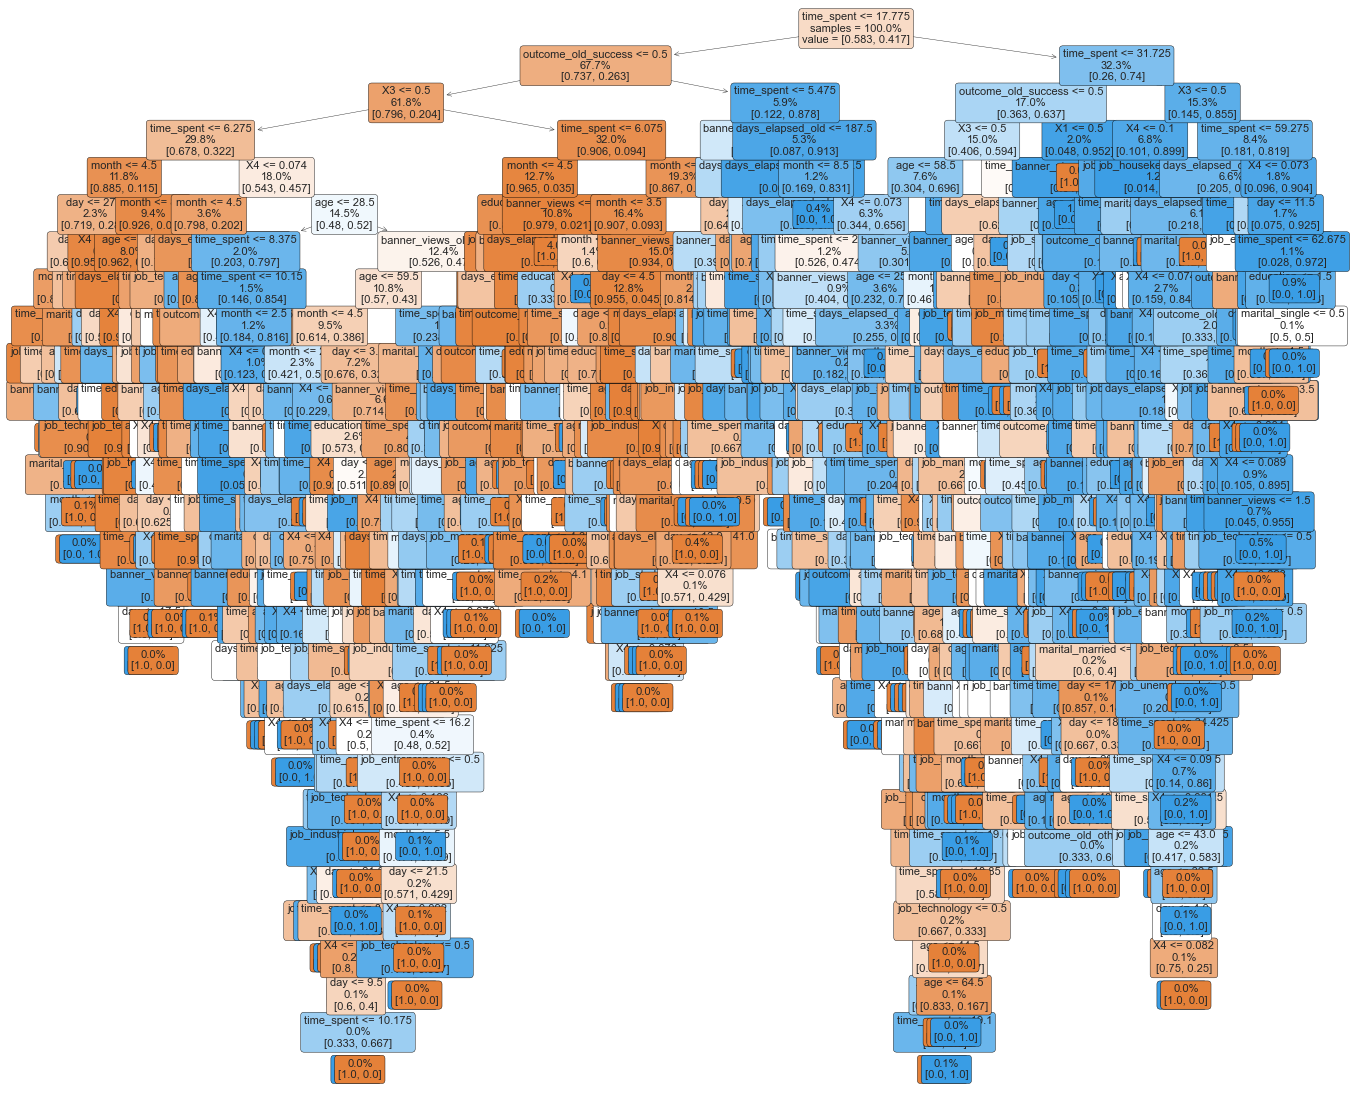

In [13]:
plt.figure(figsize=(16,14))
plot_tree(tree_full, feature_names=X_train.columns.tolist(), impurity=False, label="root",
          filled=True, proportion=True, rounded=True, fontsize=8)
plt.show()

From the above, we can see that interpretability of the tree is not assured if it is grown to the fullest and the amount of variables is large. Additonally, it is not guaranteed that this is the best predictive model as the classification error shown previously indicates prediction accuracy of only 78% for the test set. Therefore, to find better performing models, we need to find the appropriate parameters that reduce the prediction error. 

In decision trees, one method to improve predictive performance is to *prune* the tree. This involves reducing the number of partitions made such as to not overfit the model to the training set.

In [14]:
#crate a set of parameters to use for pruning the trees
path = tree_full.cost_complexity_pruning_path(X_train, y_train)

#store to variables
ccp_alphas, impurities = path.ccp_alphas, path.impurities

A vector of pruning parameter $\alpha$ is created for use in iterations to find best parameters.

In [15]:
grid_alphas = ccp_alphas

Cross validation is a used to check for the best parameters. 

In [16]:
#define cv folds
folds = KFold(n_splits = 10, shuffle = True, random_state = 69)

#grow a full tree with baseline alpha parameter
tree_full = DecisionTreeClassifier(criterion = "log_loss", ccp_alpha = 0)
hyper_params = {"ccp_alpha": grid_alphas}

#gridsearch allows to iterate and find best combination of parameters
treeCV = GridSearchCV(estimator = tree_full,
                      scoring = "accuracy",
                      param_grid = hyper_params,
                      cv = folds)

Finally, a new tree is trained using the best parameters.

In [17]:
treeCV.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=69, shuffle=True),
             estimator=DecisionTreeClassifier(ccp_alpha=0,
                                              criterion='log_loss'),
             param_grid={'ccp_alpha': array([0.        , 0.00028803, 0.00028803, 0.00031121, 0.00031121,
       0.00031121, 0.00031121, 0.00031918, 0.00031918, 0.00031918,
       0.00031918, 0.00031918, 0.00031918, 0.00031918, 0.00031918,
       0.00031918, 0.00031918, 0.0003191...
       0.00223212, 0.00225091, 0.00231542, 0.00242646, 0.00244142,
       0.00260108, 0.00262782, 0.00262871, 0.00282308, 0.00298418,
       0.00302845, 0.00303046, 0.00319166, 0.00356437, 0.00363083,
       0.00374805, 0.00387802, 0.00471471, 0.00483115, 0.00490711,
       0.00562549, 0.00761589, 0.00776768, 0.00897458, 0.00914762,
       0.01482288, 0.03019733, 0.03689173, 0.07998872, 0.15006445])},
             scoring='accuracy')

The following section is dedicated to finding the parameters that lie within one standard error of the best parameters. This is due to the confidence interval of each parameter being in the same interval as other parameters. However, to maintain the model parsimonious, we look for the model parameters that have the least amount of splits that is still within one standard error of the best model. 

In [18]:
#save crossvalidation results in a variable
resCV = treeCV.cv_results_

#generate formulas for calculation of confidence intervals
test_Misclasif = 1 - resCV["mean_test_score"]
std_mean_err_test = resCV["std_test_score"] / np.sqrt(10)
alpha_grid = resCV["param_ccp_alpha"].data

#extract parameters
index_best = treeCV.best_index_
best_alpha = treeCV.best_params_["ccp_alpha"]

#need to check that the misclassification error is smaller than a threshold
one_se_rule_best_alpha = np.max(alpha_grid[test_Misclasif <= test_Misclasif[index_best] + std_mean_err_test[index_best]])

#show results
print("Best alpha:", best_alpha)
print("Best 1se alpha:", one_se_rule_best_alpha)

Best alpha: 0.0015374043408464787
Best 1se alpha: 0.002441424556796112


To have a beter understanding of how this works, we can plot the different CV errors and their standard error to see how if behaves through the different levels and how we can extrapolate the best 1se model from this. 

C:\Users\ficop\AppData\Local\Temp\ipykernel_272\2015550329.py:2: RuntimeWarning: divide by zero encountered in log
  plt.errorbar(x=np.log(grid_alphas), y=test_Misclasif, yerr=std_mean_err_test, capsize=3, drawstyle="steps-post")#, fmt='o'


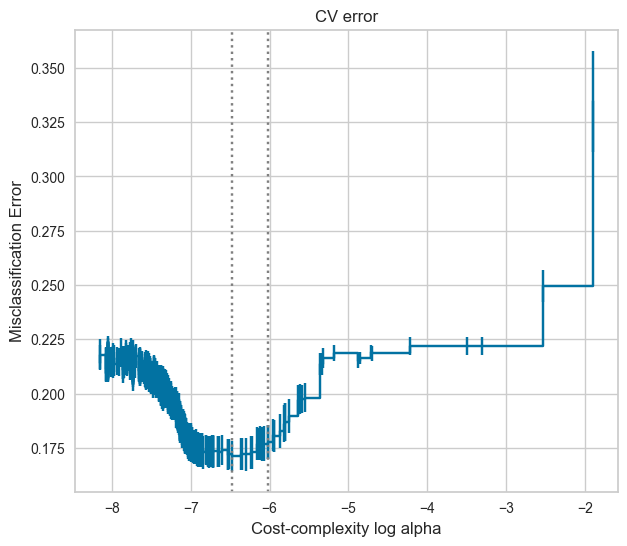

In [19]:
plt.figure(figsize=(7,6))
plt.errorbar(x=np.log(grid_alphas), y=test_Misclasif, yerr=std_mean_err_test, capsize=3, drawstyle="steps-post")#, fmt='o'

plt.axvline(np.log(best_alpha), ls='dotted', color="grey")#vertical line at the k yielding minimum CV MSE
plt.axvline(np.log(one_se_rule_best_alpha), ls='dotted', color="grey")#vertical line at best k value according to 1 std err rule

plt.title("CV error")
plt.xlabel('Cost-complexity log alpha')
plt.ylabel('Misclassification Error')
plt.show()

This done, we can save the best tree in a variable and plot the final tree.

In [20]:
#Save as object
tree_best = treeCV.best_estimator_

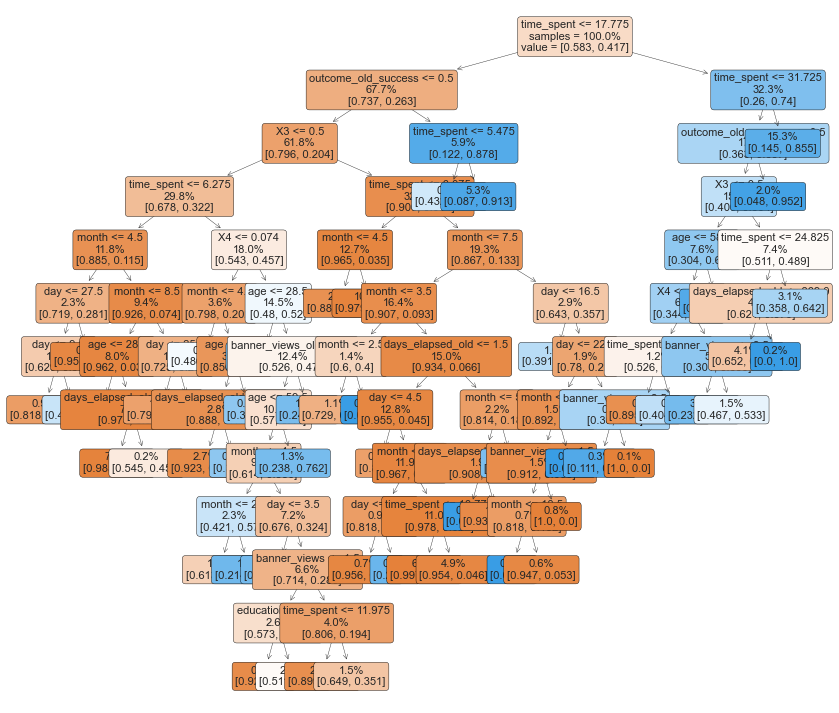

In [21]:
#plot best tree
plt.figure(figsize=(10,9))
plot_tree(tree_best, feature_names=X_train.columns.tolist(), impurity=False, label="root",
          filled=True, proportion=True, rounded=True, fontsize=8)
plt.show()

## Results: Decision Tree Best Model

In [23]:
#Print the results
print("Decision tree Best Model")
print(" ")

#fit and predict on partitioned data set
tree_best.fit(X_train,y_train)
print("Training accuracy:", round(tree_best.score(X_train, y_train),4))
print("Validation accuracy:", round(tree_best.score(X_valid, y_valid),4))
print("Test accuracy:", round(tree_best.score(X_test, y_test),4))
print("X accuracy for Partially Trained Model:", round(tree_best.score(X, y),4))

#fit and predict on all data
tree_best.fit(X,y)
print("X accuracy on Fully Trained Model:", round(tree_best.score(X, y),4))

Decision tree Best Model
 
Training accuracy: 0.8495
Validation accuracy: 0.8161
Test accuracy: 0.8451
X accuracy for Partially Trained Model: 0.8438
X accuracy on Fully Trained Model: 0.8463
